In [59]:
import pandas as pd

# Creating DataFrames

### pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)
**data:** ndarray (structured or homogeneous), Iterable, dict, or DataFrame \
**index:** Index or array-like \
**columns:** Index or array-like \
**dtype:** dtype, default None \
**copy:** bool or None, default None

In [118]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]})
df

,age,sex,height,weight
0,18,M,178,82
1,25,M,169,102
2,24,F,166,66


In [32]:
df = pd.DataFrame(
    [[18, "M", 178, 82], [25, "M", 169, 102], [24, "F", 166, 66]],
    index=[1, 2, 3],
    columns=["age", "sex", "height", "weight"])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


# Subset Observations - rows

In [33]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


In [34]:
df[(df.age > 20) | (df.weight > 100)]

,age,sex,height,weight
2,25,M,169,102
3,24,F,166,66


In [35]:
df[(df.age > 20) & (df.weight > 100)]

,age,sex,height,weight
2,25,M,169,102


In [36]:
df.head(2)

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102


In [37]:
df.tail(2)

,age,sex,height,weight
2,25,M,169,102
3,24,F,166,66


# Subset Variables - columns

In [38]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


In [39]:
df["height"]

1    178
2    169
3    166
Name: height, dtype: int64

In [40]:
df[["age", "height"]]

,age,height
1,18,178
2,25,169
3,24,166


### df.filter(items=None, like=None, regex=None, axis=None)
**items:** list-like \
**like:** str \
**regex:** str (regular expression) \
**axis:** {0 or ‘index’, 1 or ‘columns’, None}, default None

In [41]:
df.filter(items=["sex", "height"])

,sex,height
1,M,178
2,M,169
3,F,166


In [61]:
df.filter(regex="ght$")

,height,weight
1,178,82
2,169,102
3,166,66


# Subsets - rows and columns

In [42]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


### df.loc[]
Access a group of rows and columns by label(s) or a boolean array. \
**Range Inclusive**

In [47]:
df.loc[:, ["age", "weight"]]

,age,weight
1,18,82
2,25,102
3,24,66


In [55]:
df.loc[2:3, "age":"height"]

,age,sex,height
2,25,M,169
3,24,F,166


In [48]:
df.loc[df.age > 20, ["height", "weight"]]

,height,weight
2,169,102
3,166,66


### df.iloc[]
Purely integer-location based indexing for selection by position. \
**End Exclusive**

In [51]:
df.iloc[:, [0, 3]]

,age,weight
1,18,82
2,25,102
3,24,66


In [53]:
df.iloc[1:]

,age,sex,height,weight
2,25,M,169,102
3,24,F,166,66


### df.at[]
Access a single value for a row/column label pair.

In [56]:
df.at[3, "height"]

166

### df.iat[]
Access a single value for a row/column pair by integer position.

In [58]:
df.iat[2, 2]

166

# Using query

### df.query(expr, *, inplace=False, **kwargs)
Query the columns of a DataFrame with a boolean expression.

**expr:** str \
**inplace:** bool \
****kwargs**

In [135]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["Male", "Male", "Female"], "height": [178, 169, 166], 
     "weight": [82, 102, 66], "number of days": [30, 103, 83]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight,number of days
1,18,Male,178,82,30
2,25,Male,169,102,103
3,24,Female,166,66,83


In [136]:
df.query("age > 20 and weight > 100")

,age,sex,height,weight,number of days
2,25,Male,169,102,103


In [137]:
df.query("`number of days` <= 100")

,age,sex,height,weight,number of days
1,18,Male,178,82,30
3,24,Female,166,66,83


In [138]:
df.query("sex.str.startswith('M')")

,age,sex,height,weight,number of days
1,18,Male,178,82,30
2,25,Male,169,102,103


# Make New Columns

In [8]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = ["Eric", "Sam", "Mary"])
df

,age,sex,height,weight
Eric,18,M,178,82
Sam,25,M,169,102
Mary,24,F,166,66


In [9]:
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2
df

,age,sex,height,weight,BMI
Eric,18,M,178,82,25.880571
Sam,25,M,169,102,35.713035
Mary,24,F,166,66,23.951227


### df.assign(**kwargs)

Assign new columns to a DataFrame.

****kwargs:** dict of {str: callable or Series}

In [10]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = ["Eric", "Sam", "Mary"])
df

,age,sex,height,weight
Eric,18,M,178,82
Sam,25,M,169,102
Mary,24,F,166,66


In [12]:
df = df.assign(BMI=lambda df: df["weight"] / (df["height"] / 100) ** 2)
df

,age,sex,height,weight,BMI
Eric,18,M,178,82,25.880571
Sam,25,M,169,102,35.713035
Mary,24,F,166,66,23.951227


# Reshaping Data

### pd.concat(objs, *, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)

**objs:** a sequence or mapping of Series or DataFrame objects \
**axis:** {0/’index’, 1/’columns’}, default 0 \
**join:** {‘inner’, ‘outer’}, default ‘outer’ \
**ignore_index:** bool, default False \
**keys:** sequence, default None \
**levels:** list of sequences, default None \
**names:** list, default None \
**verify_integrity:** bool, default False \
**sort:** bool, default False \
**copy:** bool, default True

### Concat by row

In [67]:
df1 = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df1

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


In [82]:
df2 = pd.DataFrame(
    {"age": [34, 27], "sex": ["F", "M"], "height": [153, 172], "weight": [77, 83]}, 
    index = [1, 3])
df2

,age,sex,height,weight
1,34,F,153,77
3,27,M,172,83


In [83]:
# ignore_index = reset_index
pd.concat([df1, df2], ignore_index=True)

,age,sex,height,weight
0,18,M,178,82
1,25,M,169,102
2,24,F,166,66
3,34,F,153,77
4,27,M,172,83


### Concat by column

In [94]:
df3 = pd.DataFrame(
    {"salary": [25000, 19000, 32000]}, 
    index = [1, 2, 3])
df3

,salary
1,25000
2,19000
3,32000


In [95]:
pd.concat([df1, df3], axis=1)

,age,sex,height,weight,salary
1,18,M,178,82,25000
2,25,M,169,102,19000
3,24,F,166,66,32000


### df.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

**by:** str or list of str \
**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**ascending:** bool or list of bool, default True \
**inplace:** bool, default False \
**kind:** {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, default ‘quicksort’ \
**na_position:** {‘first’, ‘last’}, default ‘last’ \
**ignore_index:** bool, default False \
**key:** callable, optional

In [96]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


In [100]:
df.sort_values(by="weight")

,age,sex,height,weight
3,24,F,166,66
1,18,M,178,82
2,25,M,169,102


In [102]:
df.sort_values(by="weight", ascending=False)

,age,sex,height,weight
2,25,M,169,102
1,18,M,178,82
3,24,F,166,66


### df.sort_index(*, axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, ignore_index=False, key=None)

**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**ascending:** bool or list-like of bools, default True \
**inplace:** bool, default False \
**kind:** {‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}, default ‘quicksort’ \
**na_position:** {‘first’, ‘last’}, default ‘last’ \
**sort_remaining:** bool, default True \
**ignore_index:** bool, default False \
**key:** callable, optional

In [105]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [2, 1, 3])
df

,age,sex,height,weight
2,18,M,178,82
1,25,M,169,102
3,24,F,166,66


In [106]:
df.sort_index()

,age,sex,height,weight
1,25,M,169,102
2,18,M,178,82
3,24,F,166,66


In [108]:
df.sort_index(ascending=False)

,age,sex,height,weight
3,24,F,166,66
2,18,M,178,82
1,25,M,169,102


### df.rename(mapper=None, *, index=None, columns=None, axis=None, copy=None, inplace=False, level=None, errors='ignore')

**mapper:** dict-like or function \
**index:** dict-like or function \
**columns:** dict-like or function \
**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**copy:** bool, default True \
**inplace:** bool, default False \
**level:** int or level name, default None \
**errors:** {‘ignore’, ‘raise’}, default ‘ignore’

In [110]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "h": [178, 169, 166], "w": [82, 102, 66]}, 
    index = [2, 1, 3])
df

,age,sex,h,w
2,18,M,178,82
1,25,M,169,102
3,24,F,166,66


In [115]:
df.rename(columns={"h": "height", "w": "weight"}, inplace=True)
df

,age,sex,height,weight
2,18,M,178,82
1,25,M,169,102
3,24,F,166,66


In [116]:
df.rename(str.upper, axis=1)

,AGE,SEX,HEIGHT,WEIGHT
2,18,M,178,82
1,25,M,169,102
3,24,F,166,66


### df.reset_index(level=None, *, drop=False, inplace=False, col_level=0, col_fill='', allow_duplicates=_NoDefault.no_default, names=None)

**level:** int, str, tuple, or list, default None \
**drop:** bool, default False \
**inplace:** bool, default False \
**col_level:** int or str, default 0 \
**col_fill:** object, default ‘’ \
**allow_duplicates:** bool, optional, default lib.no_default \
**names:** int, str or 1-dimensional list, default None

In [123]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = ["Eric", "Sam", "Mary"])
df

,age,sex,h,w
Eric,18,M,178,82
Sam,25,M,169,102
Mary,24,F,166,66


In [125]:
df.reset_index()

,index,age,sex,h,w
0,Eric,18,M,178,82
1,Sam,25,M,169,102
2,Mary,24,F,166,66


In [126]:
df.reset_index(names="name")

,name,age,sex,h,w
0,Eric,18,M,178,82
1,Sam,25,M,169,102
2,Mary,24,F,166,66


### df.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

Drop specified labels from rows or columns.

**labels:** single label or list-like \
**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**index:** single label or list-like \
**columns:** single label or list-like \
**level:** int or level name, optional \
**inplace:** bool, default False \
**errors:** {‘ignore’, ‘raise’}, default ‘raise’

In [130]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = ["Eric", "Sam", "Mary"])
df

,age,sex,height,weight
Eric,18,M,178,82
Sam,25,M,169,102
Mary,24,F,166,66


In [133]:
df.drop(index=["Sam"])

,age,sex,height,weight
Eric,18,M,178,82
Mary,24,F,166,66


In [134]:
df.drop(columns=["height", "weight"])

,age,sex
Eric,18,M
Sam,25,M
Mary,24,F


# Handling Missing Data

### df.fillna(value=None, *, method=None, axis=None, inplace=False, limit=None, downcast=None)
**value:** scalar, dict, Series, or DataFrame \
**method:** {‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None}, default None \
**axis:** {0 or ‘index’, 1 or ‘columns’} \
**inplace:** bool, default False \
**limit:** int, default None \
**downcast:** dict, default is None

### df.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False)
**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**how:** {‘any’, ‘all’}, default ‘any’ \
**thresh:** int, optional \
**subset:** column label or sequence of labels, optional \
**inplace:** bool, default False

In [4]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, None, 166], "weight": [82, 102, 66]}, 
    index = ["Eric", "Sam", "Mary"])
df

,age,sex,height,weight
Eric,18,M,178.0,82
Sam,25,M,NaN,102
Mary,24,F,166.0,66


In [6]:
df.fillna(0)

,age,sex,height,weight
Eric,18,M,178.0,82
Sam,25,M,0.0,102
Mary,24,F,166.0,66


In [7]:
df.dropna(inplace=True)
df

,age,sex,height,weight
Eric,18,M,178.0,82
Mary,24,F,166.0,66


# Combine Datasets

Merge DataFrame or named Series objects with a database-style join.

### df.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

**right:** DataFrame or named Series \
**how:** {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’ \
**on:** label or list \
**left_on:** label or list, or array-like \
**right_on:** label or list, or array-like \
**left_index:** bool, default False \
**right_index:** bool, default False \
**sort:** bool, default False \
**suffixes:** list-like, default is (“_x”, “_y”) \
**copy:** bool, default True \
**indicator:** bool or str, default False \
**validate:** str, optional

In [24]:
df1 = pd.DataFrame(
    {"Name": ["Eric", "Sam", "Mary"], "age": [18, 25, 24], "sex": ["M", "M", "F"]})
df1

,Name,age,sex
0,Eric,18,M
1,Sam,25,M
2,Mary,24,F


In [26]:
df2 = pd.DataFrame(
    {"Name": ["Eric", "Sam", "Francis"], "height": [178, 169, 166], "weight": [82, 102, 66]})
df2

,Name,height,weight
0,Eric,178,82
1,Sam,169,102
2,Francis,166,66


In [29]:
df1.merge(df2, how="inner", on="Name")

,Name,age,sex,height,weight
0,Eric,18,M,178,82
1,Sam,25,M,169,102


In [30]:
df1.merge(df2, how="left", on="Name")

,Name,age,sex,height,weight
0,Eric,18,M,178.0,82.0
1,Sam,25,M,169.0,102.0
2,Mary,24,F,NaN,NaN


In [31]:
df1.merge(df2, how="right", on="Name")

,Name,age,sex,height,weight
0,Eric,18.0,M,178,82
1,Sam,25.0,M,169,102
2,Francis,NaN,NaN,166,66


In [32]:
df1.merge(df2, how="outer", on="Name")

,Name,age,sex,height,weight
0,Eric,18.0,M,178.0,82.0
1,Sam,25.0,M,169.0,102.0
2,Mary,24.0,F,NaN,NaN
3,Francis,NaN,NaN,166.0,66.0


# Summarize Data

|Summary functions|Details|
|-|-|
|sum()|Sum values of each object.|
|count()|Count non-NA/null values of each object.|
|median()|Median value of each object.|
|quantile([0.25,0.75])|Quantiles of each object.|
|apply(function)|Apply function to each object.|
|min()|Minimum value in each object.|
|max()|Maximum value in each object.|
|mean()|Mean value of each object.|
|var()|Variance of each object.|
|std()|Standard deviation of each object.|

In [13]:
df = pd.DataFrame(
    {"age": [18, 25, 24], "sex": ["M", "M", "F"], "height": [178, 169, 166], "weight": [82, 102, 66]}, 
    index = [1, 2, 3])
df

,age,sex,height,weight
1,18,M,178,82
2,25,M,169,102
3,24,F,166,66


In [14]:
# Number of rows
len(df)

3

In [17]:
# Tuple of number of rows and columns
df.shape

(3, 4)

In [20]:
# Summarizes data
df.describe()

,age,height,weight
count,3.000000,3.000000,3.000000
mean,22.333333,171.000000,83.333333
std,3.785939,6.244998,18.036999
min,18.000000,166.000000,66.000000
25%,21.000000,167.500000,74.000000
50%,24.000000,169.000000,82.000000
75%,24.500000,173.500000,92.000000
max,25.000000,178.000000,102.000000


In [40]:
df["age"].apply(lambda x: x ** 2)

0    324
1    625
2    576
Name: age, dtype: int64

### df.nunique(axis=0, dropna=True)

Count number of distinct elements in specified axis.

**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**dropna:** bool, default True

In [21]:
df.nunique()

age       3
sex       2
height    3
weight    3
dtype: int64

### df.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Return a Series containing counts of unique values.

**normalize:** bool, default False \
**sort:** bool, default True \
**ascending:** bool, default False \
**bins:** int, optional \
**dropna:** bool, default True

In [23]:
df["sex"].value_counts()

M    2
F    1
Name: sex, dtype: int64

# Group Data

Group DataFrame using a mapper or by a Series of columns.

**by:** mapping, function, label, or list of labels \
**axis:** {0 or ‘index’, 1 or ‘columns’}, default 0 \
**level:** int, level name, or sequence of such, default None \
**as_index:** bool, default True \
**sort:** bool, default True \
**group_keys:** bool, optional \
**squeeze:** bool, default False \
**observed:** bool, default False \
**dropna:** bool, default True

In [47]:
df = pd.DataFrame(
    {"age": [18, 25, 24, 33], "sex": ["M", "M", "F", "M"], 
     "height": [178, 169, 166, 182], "weight": [82, 102, 66, 89]})
df

,age,sex,height,weight
0,18,M,178,82
1,25,M,169,102
2,24,F,166,66
3,33,M,182,89


In [48]:
# You could use summary functions on the groupby object
df.groupby(by="sex").mean()

,age,height,weight
sex,,,
F,24.000000,166.000000,66.0
M,25.333333,176.333333,91.0


In [50]:
# Cumulative sum
df.groupby(by="sex").cumsum()

,age,height,weight
0,18,178,82
1,43,347,184
2,24,166,66
3,76,529,273


In [51]:
# Rank
df.groupby(by="sex").rank()

,age,height,weight
0,1.0,2.0,1.0
1,2.0,1.0,3.0
2,1.0,1.0,1.0
3,3.0,3.0,2.0


# Plotting

In [56]:
df = pd.DataFrame(
    {"age": [18, 25, 24, 33], "sex": ["M", "M", "F", "M"], 
     "height": [178, 169, 166, 182], "weight": [82, 102, 66, 89]})
df

,age,sex,height,weight
0,18,M,178,82
1,25,M,169,102
2,24,F,166,66
3,33,M,182,89


<Axes: xlabel='height', ylabel='weight'>

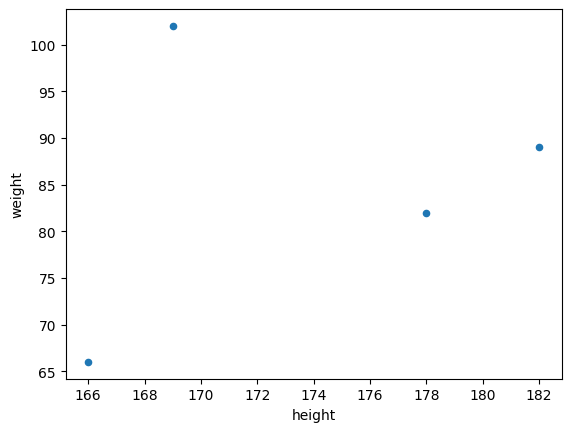

In [60]:
df.plot.scatter(x="height", y="weight")